# Image denoising using PCA

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from cv2 import imread
from patchify import patchify, unpatchify

## Loading the image

In [2]:
img = imread("figs/balloons_noisy.png", 0)

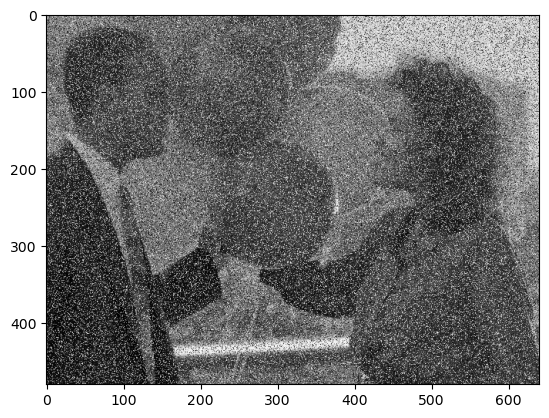

In [3]:
plt.imshow(img, cmap="gray")
plt.show()

## Extracting patches from the image

In [4]:
patches = patchify(img, (32, 32), step=1)

In [5]:
X = np.reshape(patches, (-1, 32*32))

## Applying PCA

In [6]:
pca = PCA(n_components=170)
X_low_dimensional = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_low_dimensional)

## Reconstructing the image from the patches

In [7]:
patches_reconstructed = np.reshape(X_reconstructed, patches.shape)

In [8]:
img_reconstructed = unpatchify(patches_reconstructed, img.shape)

## Final result

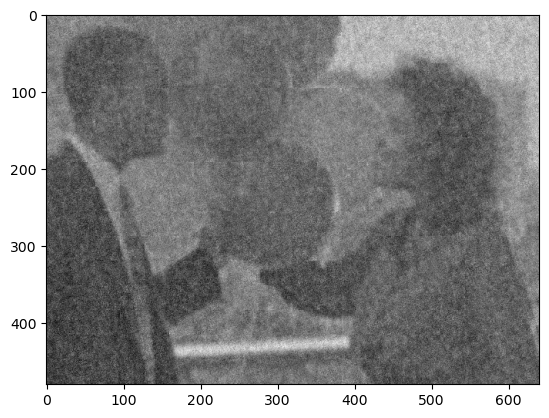

In [9]:
plt.imshow(img_reconstructed, cmap="gray")
plt.show()